In [69]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [70]:
df = pd.read_csv("data/weather.csv")
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [71]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    str    
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    str    
 8   WindDir3pm     365 non-null    str    
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm        366 no

In [72]:
print(df.isnull().sum())
df.dropna(inplace=True)
print(df.isnull().sum())

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


In [73]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [74]:
X = df.drop("RainTomorrow", axis=1)
y = df["RainTomorrow"]
y = y.map({'No': 0, 'Yes': 1})
category_features = X.select_dtypes(include=['object', 'str']).columns
print(category_features)

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), category_features)], remainder='passthrough')
X = ct.fit_transform(X)
print(X)

Index(['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='str')
[[ 0.   0.   0.  ... 14.4 23.6  3.6]
 [ 0.   1.   0.  ... 17.5 25.7  3.6]
 [ 0.   0.   0.  ... 15.4 20.2 39.8]
 ...
 [ 0.   0.   1.  ... 14.5 18.3  0. ]
 [ 0.   0.   0.  ... 15.8 25.9  0. ]
 [ 0.   0.   0.  ... 23.8 28.6  0. ]]


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled= scaler.fit_transform(X)


In [76]:
import numpy as np

def create_sequences(X, y, window_size=7):
    X_seq,y_seq = [], []
    for i in range(len(X) - window_size):
        X_seq.append(X[i:i+window_size])
        y_seq.append(y.iloc[i+window_size])
    
    return np.array(X_seq), np.array(y_seq)

In [77]:
X_seq, y_seq = create_sequences(X=X_scaled,y=y, window_size=7)
print(X_seq.shape, y_seq.shape)
print(X_seq[0])

(321, 7, 67) (321,)
[[0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  1.         0.         0.50763359 0.59219858 0.         0.23529412
  0.46323529 0.2        0.1025641  0.33333333 0.50793651 0.2
  0.59183673 0.5        0.875      0.875      0.58130081 0.6292517
  0.09045226]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.  

In [78]:
split = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split], X_seq[split:]
y_train, y_test = y_seq[:split], y_seq[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(256, 7, 67) (256,)
(65, 7, 67) (65,)


In [79]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [80]:
model = Sequential([
    LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/Users/bikaschaudharytharu/python/ml-traning/.venv/lib/python3.13/site-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 64)             │        33,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,857 (132.25 KB)

 Trainable params: 33,857 (132.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6875 - loss: 0.6229 - val_accuracy: 0.8462 - val_loss: 0.4837
Epoch 2/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4723 - val_accuracy: 0.8462 - val_loss: 0.4337
Epoch 3/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4852 - val_accuracy: 0.8462 - val_loss: 0.4365
Epoch 4/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4845 - val_accuracy: 0.8462 - val_loss: 0.4373
Epoch 5/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8203 - loss: 0.4540 - val_accuracy: 0.8462 - val_loss: 0.4383
Epoch 6/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4574 - val_accuracy: 0.8462 - val_loss: 0.4384
Epoch 7/400
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8203 - loss: 0.4520 - val_accuracy: 0.8462 - val_loss: 0.4414


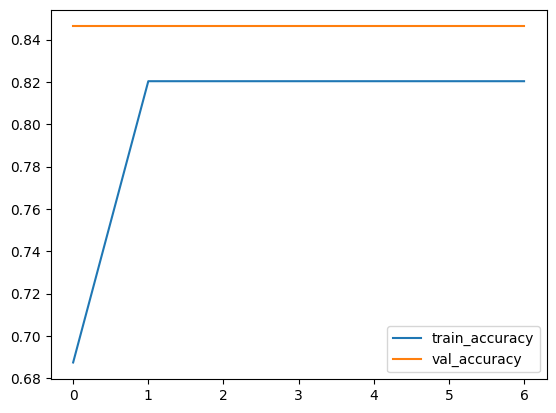

In [81]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

In [82]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.8462


In [ ]:
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)
y_pred[:10]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
[[[0.         0.         0.         ... 0.24796748 0.14965986 0.        ]
  [0.         0.         0.         ... 0.3699187  0.23469388 0.        ]
  [0.         0.         0.         ... 0.3495935  0.28571429 0.        ]
  ...
  [0.         0.         0.         ... 0.05284553 0.20748299 0.        ]
  [0.         0.         0.         ... 0.         0.2414966  0.        ]
  [0.         0.         0.         ... 0.31707317 0.24829932 0.        ]]

 [[0.         0.         0.         ... 0.3699187  0.23469388 0.        ]
  [0.         0.         0.         ... 0.3495935  0.28571429 0.        ]
  [0.         0.         0.         ... 0.17886179 0.19387755 0.        ]
  ...
  [0.         0.         0.         ... 0.         0.2414966  0.        ]
  [0.         0.         0.         ... 0.31707317 0.24829932 0.        ]
  [0.         0.         0.         ... 0.34552846 0.2755102  0.        ]]

 [[0.         0.         0.         ... 0.3495935  0.285714

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0]])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        55
           1       0.00      0.00      0.00        10

    accuracy                           0.85        65
   macro avg       0.42      0.50      0.46        65
weighted avg       0.72      0.85      0.78        65



/Users/bikaschaudharytharu/python/ml-traning/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bikaschaudharytharu/python/ml-traning/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/bikaschaudharytharu/python/ml-traning/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beha